## **Churn prediction model using python**
We used different models and we checked the evaluations of this model to see which one is better to use. We tried the following model
1. RandomForestClassifier
2. LogisticRegression
3. Support Vector Machine
4. GradientBoostingClassifier and
5. KNeighborsClassifier

Import the Libraries, load and take a look at what the data looks like

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df = pd.read_csv('data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Basic data checks and clearning
1. CHeck the data info (Data types and etc)
2. check for null and fix
3. Check for duplicate and fix

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
df.duplicated().sum()

np.int64(0)

We need to encode the Genda, so it become numeric
Also, we need to encode the Geography column and make it numeric as well

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'],drop_first=True)
#df = pd.get_dummies(df, columns=['Geography'],drop_first=True)
df.head()

In [11]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
5,6,15574012,Chu,645,1,44,8,113755.78,2,1,0,149756.71,1,False,True
6,7,15592531,Bartlett,822,1,50,7,0.00,2,1,1,10062.80,0,False,False
7,8,15656148,Obinna,376,0,29,4,115046.74,4,1,0,119346.88,1,True,False
8,9,15792365,He,501,1,44,4,142051.07,2,0,1,74940.50,0,False,False
9,10,15592389,H?,684,1,27,2,134603.88,1,1,1,71725.73,0,False,False


#Feature selection is next.
Columns like customerID and surname are irrelevant to our prediction model
1. Lets get all the columns 1st
2. Pick the ones we need for our feature
3. SPlit the data into train and test dataset
4. We scale our data for performance to help improve performance and training stability and avoid bias. ensure thesame scalling is applied to both training and test data
5. Check the outcome of the scalled data

In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [17]:
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']
X = df[features]
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled[:,5],X_test_scaled[:,5]

(array([ 0.80843615,  0.80843615, -0.91668767, ...,  2.53355998,
        -0.91668767, -0.91668767]),
 array([ 0.80843615,  0.80843615,  0.80843615, ..., -0.91668767,
        -0.91668767, -0.91668767]))

In [22]:
X_train_scaled

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.36766974,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ...,  1.6612541 ,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.25280688,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ..., -0.1427649 ,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ..., -0.05082558,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.81456811,
         1.72572313, -0.57638802]])

In [23]:
X_test_scaled

array([[-0.57749609,  0.91324755, -0.6557859 , ..., -1.01960511,
         1.72572313, -0.57638802],
       [-0.29729735,  0.91324755,  0.3900109 , ...,  0.79888291,
        -0.57946723, -0.57638802],
       [-0.52560743, -1.09499335,  0.48508334, ..., -0.72797953,
        -0.57946723,  1.73494238],
       ...,
       [ 0.81311987, -1.09499335,  0.77030065, ..., -1.16591585,
        -0.57946723, -0.57638802],
       [ 0.41876609,  0.91324755, -0.94100321, ..., -0.41163463,
        -0.57946723, -0.57638802],
       [-0.24540869,  0.91324755,  0.00972116, ...,  0.12593183,
         1.72572313, -0.57638802]])

#Now, Lets start to look at the models - RandomForestClassifier
1. Lets see what Randon forest gives us
2. Lets get the confusion matrix
3. Lets get our evaluaton reports - Confusion matrix, Classification, and Accuracy reports
4. We need to check the feature importance as well

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[1548   59]
 [ 208  185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000


Accuracy: 0.8665


Feature Importances:
Age: 0.23824178009335498
EstimatedSalary: 0.14688693146004067
CreditScore: 0.14332418221385146
Balance: 0.13934046611256293
NumOfProducts: 0.13065902191897852
Tenure: 0.08224282011896461
IsActiveMember: 0.041852077849893386
Geography_Germany: 0.025766060438057674
Gender: 0.019186813294051953
HasCrCard: 0.0188534845028686
Geography_Spain: 0.013646361997375307


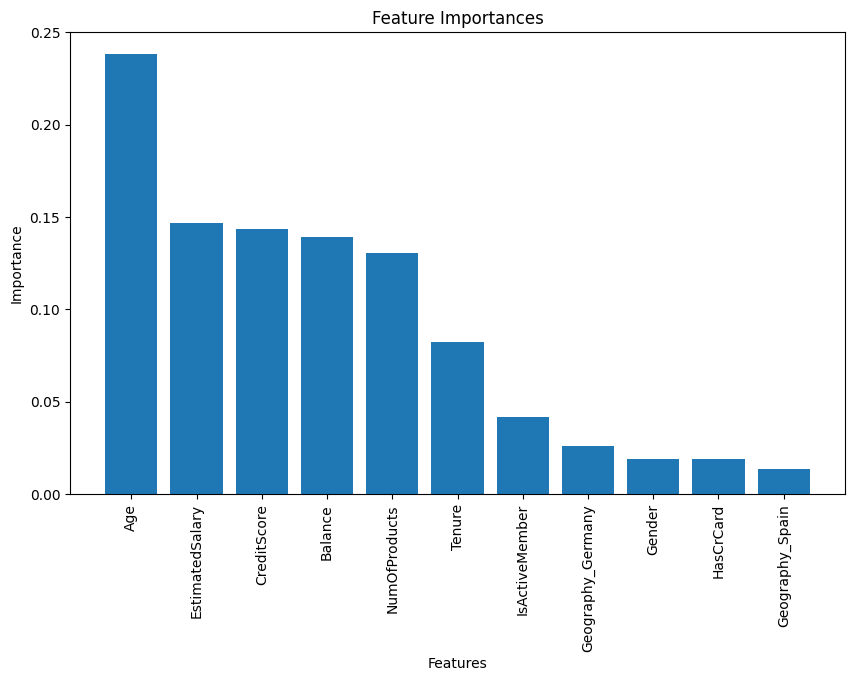

In [29]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

feature_name = [features[i] for i in indices]


print("Feature Importances:")
for f in range(X_train.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]}")

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_name, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()


#Another model -  LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Build the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

#Cheking the evaluations
log_conf_matrix = confusion_matrix(y_test, y_pred)
log_class_report = classification_report(y_test, y_pred)
log_accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(log_conf_matrix)
print("\nClassification Report:")
print(log_class_report)
print("\nAccuracy:", log_accuracy)

Confusion Matrix:
[[1543   64]
 [ 314   79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


Accuracy: 0.811


#Support Vector Machine Model

In [32]:
from sklearn.svm import SVC

#Build the model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

#make the Predictions
y_pred = svm_model.predict(X_test_scaled)

#Evaluations of the model
svm_conf_matrix = confusion_matrix(y_test, y_pred)
svm_class_report = classification_report(y_test, y_pred)
svm_accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(svm_conf_matrix)
print("\nClassification Report:")
print(svm_class_report)
print("\nAccuracy:", svm_accuracy)

Confusion Matrix:
[[1562   45]
 [ 243  150]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000


Accuracy: 0.856


#Another model - KNeighborsClassification

In [33]:
from sklearn.neighbors import KNeighborsClassifier

#Build and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

#Make predictions
y_pred = knn_model.predict(X_test_scaled)

#Perform the evaluation of teh model
knn_conf_matrix = confusion_matrix(y_test, y_pred)
knn_class_report = classification_report(y_test, y_pred)
knn_accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(knn_conf_matrix)
print("\nClassification Report:")
print(knn_class_report)
print("\nAccuracy:", knn_accuracy)

Confusion Matrix:
[[1514   93]
 [ 247  146]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000


Accuracy: 0.83


# And the GradientBoostingClassifier Model

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

#Build and train the model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

#Make predictions
y_pred = gb_model.predict(X_test_scaled)

#Evaluation
gb_conf_matrix = confusion_matrix(y_test, y_pred)
gb_class_report = classification_report(y_test, y_pred)
gb_accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(gb_conf_matrix)
print("\nClassification Report:")
print(gb_class_report)
print("\nAccuracy:", gb_accuracy)

Confusion Matrix:
[[1543   64]
 [ 201  192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000


Accuracy: 0.8675


#And here we are. Based one our dataset, and scalled features, here are the accuracy reult of the evaluation of different models:

1. RandomForestClassifier - 0.8665
2. LogisticRegression - 0.811
3. Support Vector Machine - 0.856
4. KNeighborsClassifier and - 0.83
5. GradientBoostingClassifier - 0.8675

WHile we cna say all the model did well, having over 80%, but GradientBoostingClassifier is the winner with about 87%